# $$ \textbf{Sinais e Sistemas Dinâmicos 2024.1}$$

### Curso de Engenharia de Computação - UFPB/2024.1

# Aula 02

In [2]:
## Importação das bibliotecas Python, como indicado no texto ##

# biblioteca Python para matemática simbólica 
import sympy as sym
from sympy import* 

# Pacote para computação científica
import numpy as np

# biblioteca para a visualização de dados em Python.
import matplotlib.pyplot as plt

from pylab import plot, show

# Este módulo fornece acesso às funções matemáticas (definidas pelo padrão C)
import math

# cmath permite operações com números complexos
import cmath

# O módulo de frações fornece suporte para aritmética de números racionais
from fractions import Fraction

# permite usar latex para exibir equações matemáticas no Jupyter Notebook
from IPython.display import display, Math

#toolbox de processamento de sinais
from scipy import signal 

No estudo de sinais, existem algumas funções que são especiais e que, portanto, merecem ser apresentadas e estudadas de maneira mais detalhada. Todas elas são definidas no domínio real $\mathbb{R}$ e têm imagem neste mesmo conjunto.

- Degrau unitário: Trata-se de uma das funções mais importantes no estudo de sinais. Ela é definida por
$$
v(t)=\left\{\begin{array}{lll}
1 & , & t \geq 0 \\
0 & , & t<0
\end{array}\right.
$$
observe que ela é descontínua em $t=0$, sendo que $v(0)=1$.

- Retângulo unitário: Trata-se de uma função usada para selecionar partes simétricas (em relação à origem) de sinais. Ela é definida na forma
$$
\vartheta(t)=\left\{\begin{array}{lll}
1 & , & |t|<1 \\
0 & , & |t|>1
\end{array}\right.
$$
e tem dois pontos de descontinuidade que satisfazem $|t|=1$. Ao ser escrita como uma composição de dois degraus unitários deslocados, ou seja, $\vartheta(t)=$ $v(t+1)-v(t-1)$, os valores $\vartheta(-1)=1$ e $\vartheta(1)=0$ ficam determinados.

- Seno normalizado: Trata-se de uma função definida na forma
$$
\operatorname{sinc}(t)=\left\{\begin{array}{l}
1, \quad &t =0 \\
\operatorname{sen}(t) / t , \quad &t \neq 0
\end{array}\right.
$$

Deve ser imediatamente notado que esta é uma função contínua em todos os pontos do seu domínio, em particular, em $t=0$. Ela se anula nos instantes $t_n=n \pi$ para todo $n \in \mathbb{Z}$.

Por fim, desejamos introduzir não uma função, mas um ente matemático que tem importância capital no estudo de sinais (e de sistemas). Trata-se do chamado ``impulso unitário``, que é denotado por $\delta(t)$ e é definido através das propriedades
$$
\delta(t)=0, \forall t \neq 0, \int_{-\infty}^{\infty} \delta(t) d t=1
$$

Como o impulso pode ser diferente de zero apenas em $t=0$, a integral acima exige que o valor do impulso em $t=0$ seja ilimitado. Várias são as possibilidades para obtermos $\delta(t)$ a partir destas duas condições. Uma delas é determinar o impulso unitário através do limite
$$
\delta(t)=\lim _{\varepsilon \rightarrow 0^{+}} \frac{v(t)-v(t-\varepsilon)}{\varepsilon}
$$
que não pode ser confundido com o valor usual da derivada temporal $\delta(t)=\dot{v}(t)$, pois a função degrau não é nem mesmo contínua em $t=0$. É possível interpretar esta relação como sendo uma ``derivada generalizada`` que pode ser calculada em pontos onde a função envolvida não é contínua. 

Outra possibilidade é $$
\delta(t)=\lim _{\varepsilon \rightarrow 0^{+}}\left(\frac{1}{\varepsilon}\right) e^{-t / \varepsilon} v(t)
$$
em que a função no lado direito, para qualquer $\varepsilon>0$ dado, é descontínua em $t=0$. Entretanto, a seguinte forma
$$
\delta(t)=\lim _{\varepsilon \rightarrow 0^{+}}\left(\frac{t}{\varepsilon^2}\right) e^{-t / \varepsilon} v(t)
$$
também é válida e tem a vantagem de ser uma função contínua em todos os pontos do seu domínio, inclusive em $t=0$, para qualquer $\varepsilon>0$ dado. Um outro aspecto ligado ao impulso unitário merece especial atenção. Veremos mais adiante durante o estudo da transformada de Fourier que a seguinte igualdade é verdadeira:
$$
\frac{1}{2 \pi} \int_{-\infty}^{\infty} e^{j \omega t} d \omega=\delta(t)
$$

Isto quer dizer que, para $t \neq 0$ dado, o valor da integral converge para zero. De fato, considerando $w=n \pi / t$ com $n \in \mathbb{Z}$ podemos calcular o valor principal do limite
$$
\begin{aligned}
\lim _{w \rightarrow \infty} \frac{1}{2 \pi} \int_{-w}^w e^{j \omega t} d \omega & =\lim _{n \rightarrow \infty} \frac{1}{2 \pi} \int_{-n \pi / t}^{n \pi / t} e^{j \omega t} d \omega \\
& =\lim _{n \rightarrow \infty}\left(\frac{1}{\pi|t|}\right) \operatorname{sen}(n \pi) \\
& =0
\end{aligned}
$$

Por outro lado, para $t=0$, verificamos diretamente de $\frac{1}{2 \pi} \int_{-\infty}^{\infty} e^{j \omega t} d \omega=\delta(t)$ que o valor da integral diverge para $+\infty$. 


A Figura 2.3 mostra as funções
$$
\begin{aligned}
\delta_w(t) & =\frac{1}{2 \pi} \int_{-w}^w e^{j \omega t} d \omega \\
& =\left(\frac{w}{\pi}\right) \operatorname{sinc}(w t)
\end{aligned}
$$
calculadas no intervalo de tempo $|t| \leq 1 / 2[\mathrm{~s}]$ para os valores indicados do limite máximo de frequência $w$ expresso em $[\mathrm{rad} / \mathrm{s}]$. 

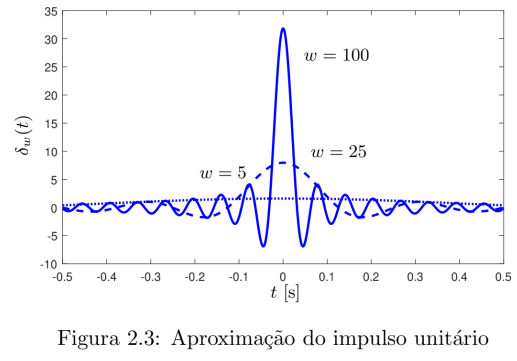


Nota-se a convergência para valores de $t \neq 0$ e a divergência para $t=0$, conforme $w>0$ aumenta. O impulso, portanto, pode ser interpretado como um indicador da ocorrência de uma divergência em uma determinada operação matemática, resultado de um processo de passagem ao limite para $\pm \infty$. Entretanto, para ser da forma impulsiva, a referida divergência deve ocorrer de maneira especial, qual seja, mantendo o valor da sua integral igual a um. 

Lembrando uma integral conhecida, temos
$$
\begin{aligned}
\int_{-\infty}^{\infty} \delta_w(t) d t & =\left(\frac{w}{\pi}\right) \int_{-\infty}^{\infty} \operatorname{sinc}(w t) d t \\
& =\int_{-\infty}^{\infty} \operatorname{sinc}(\pi \xi) d \xi=1
\end{aligned}
$$
que é independente do valor de $w>0$ e atesta que $\delta(t)=\lim _{w \rightarrow \infty} \delta_w(t)$. Como ficará claro no decorrer deste curso, o impulso unitário tem um papel central no estudo de sinais e sistemas. Talvez isso se deva ao fato de que a igualdade
$$
\int_{-\infty}^{\infty} f(t) \delta(t-\tau) d t=f(\tau)
$$
seja verdadeira para toda função contínua com domínio em $\mathbb{R}$. O impulso permite individualizar o valor de uma função contínua em qualquer instante $\tau \in \mathbb{R}$ do seu domínio. Como $\delta(t-\tau)=0$ para todo $t \neq \tau$, a verificação da veracidade de $\int_{-\infty}^{\infty} f(t) \delta(t-\tau) d t=f(\tau)$ é imediata.

Com o impulso podemos também construir funções mais elaboradas, como por exemplo
$$
v(t)=\int_{-\infty}^t \delta(\xi) d \xi
$$
pois a integral acima, levando em conta as propriedades do impulso, é nula para todo $t<0$ e é igual a 1 para todo $t \geq 0$. As manipulações algébricas com o impulso requerem certa atenção e cautela, sobretudo quando envolvem diferenciação em relação ao tempo.

Por fim, desejamos enfatizar que apresentamos as mais variadas propriedades dos sinais a tempo contínuo de forma bastante genérica. Neste sentido, consideramos $\mathbb{R}$ o seu domínio e $\mathbb{C}$ o seu conjunto imagem. O tratamento no domínio complexo e não real, ao contrário do que se possa imaginar, simplifica as manipulações matemáticas, sobretudo aquelas que envolvem as funções trigonométricas seno e cosseno. Esta afirmação ficará mais evidente no decorrer do texto. Para o tratamento exclusivo de sinais com imagem real a única modificação requerida é a substituição do conjugado de um sinal por ele próprio.

####  Sinais a Tempo Discreto

Os sinais a tempo discreto são aqueles com domínio $\mathbb{Z}$ e com imagem em $\mathbb{R}$ ou $\mathbb{C}$. Vamos seguir exibindo resultados similares àqueles que apresentamos na seção anterior. Em larga medida, quase tudo pode ser refeito, mas com um ferramental matemático um pouco diverso. 

``É preciso alertar que, em geral, calcular somas é mais trabalhoso e mais complicado do que calcular integrais.``


**Definição (Produto escalar)** O produto escalar de dois sinais $f(k)$ e $g(k)$ com o mesmo domínio $\mathbb{Z}$ e imagem $\mathbb{C}$ é um número complexo dado por
$$
\langle f, g\rangle=\sum_{k=-\infty}^{\infty} f(k) g(k)^*
$$

Assim definido, o produto escalar satisfaz os axiomas da simetria (conjugada), da distributividade, da homogeneidade e da positividade. Em consequência, a norma induzida é então dada por
$$
\|f\|=\sqrt{\langle f, f\rangle}=\sqrt{\sum_{k=-\infty}^{\infty}|f(k)|^2}
$$
e é importante ressaltar a possibilidade da soma indicada divergir. 

De fato, se existir uma constante real $\alpha>0$ tal que $|f(k)| \leq \alpha$ para todo $k \in \mathbb{Z}$, então $\|f\| \leq+\infty$. A norma de um sinal constante no tempo é $+\infty$. Para que a sua norma seja finita é necessário (mas não suficiente) que $|f(k)| \rightarrow 0$ quando $|k| \rightarrow \infty$. Podemos então concluir que todo sinal periódico tem norma infinita. Uma outra medida do tamanho de um sinal é dada em seguida.


**Definição (Valor eficaz)** O valor eficaz de um sinal $f(k)$ com domínio $\mathbb{Z}$ e imagem $\mathbb{C}$ é um número real não negativo dado por
$$
\|f\|_{e f}=\sqrt{\lim _{m \rightarrow \infty} \frac{1}{2 m+1} \sum_{k=-m}^m|f(k)|^2}
$$

Como o intervalo a tempo discreto $[-m, m]$ tem $2 m+1$ elementos, ``o valor eficaz de um sinal a tempo discreto tem também a simples interpretação de valor médio do seu módulo``. 

Desta forma, para um sinal limitado no tempo por uma constante, obtém-se $\|f\|_{e f} \leq \alpha$. 

O valor eficaz de um sinal constante no tempo é igual ao módulo desta constante. 

O valor eficaz de um sinal periódico é igual ao valor eficaz calculado em apenas um período. De fato, particionando $\|f\|_{e f}=\sqrt{\lim _{m \rightarrow \infty} \frac{1}{2 m+1} \sum_{k=-m}^m|f(k)|^2}$ em segmentos de tamanho $N_0 \in \mathbb{N}$, sendo $N_0>0$ o seu período, podemos calcular
$$
\begin{aligned}
\|f\|_{e f}^2 & =\lim _{m \rightarrow \infty} \frac{1}{(2 m+1)} \sum_{n=-m}^m \frac{1}{N_0} \sum_{k=n N_0}^{(n+1) N_0-1}|f(k)|^2 \\
& =\frac{1}{N_0} \sum_{k=0}^{N_0-1}|f(k)|^2
\end{aligned}
$$

em que deve ser notado que, devido à periodicidade do sinal, os valores da soma interna são iguais para todo $n \in[-m, m]$, fazendo com que a segunda igualdade se estabeleça. Como já foi possível notar, para manipular sinais a tempo discreto devemos ter bastante destreza com séries, inclusive envolvendo números complexos. Nesta direção, um dos resultados mais básicos entre os mais importantes é dado no seguinte lema. Ele torna explícita a condição de convergência da soma dos elementos de uma progressão geométrica com razão complexa.

**Lema 2.1** Considere $1 \neq z \in \mathbb{C} e 1 \leq i \in \mathbb{N}$. A igualdade
$$
\sum_{k=0}^{i-1} z^k=\frac{1-z^i}{1-z}
$$
é verdadeira. Além disso, $\sum_{k=0}^{\infty} z^k=1 /(1-z)$ converge se e somente se $|z|<1$.

**Prova:** A prova é simples e bastante conhecida. Definido $S=1+z+\cdots+z^{(i-1)}$, então a multiplicação por $z$ leva a $z S=z+z^2+\cdots+z^i$. A subtração permite calcular $(1-z) S=1-z^i$, que fornece (2.30), pois $z \neq 1$. O cálculo do limite de (2.30) para $i \rightarrow \infty$ pode ser feito desde que $\lim _{i \rightarrow \infty} z^i$ exista. Como $\left|z^i\right|=|z|^i$, isso é assegurado se e apenas se $|z|<1$. Neste caso, o referido limite é nulo e a igualdade desejada é obtida. $\square$

A sequência de números complexos
$$
1, z, z^2, z^3, \cdots, z^{(i-1)}
$$
ao ser vista como uma progressão geométrica com razão $z \in \mathbb{C}$ permite afirmar que o Lema 2.1 generaliza para o campo complexo, um resultado já bastante conhecido para sequências reais. Os exemplos resolvidos em seguida ilustram os diversos aspectos das duas últimas definições no contexto de sinais a tempo discreto. Em particular, eles são importantes para indicar como as diversas somas que aparecem nas mencionadas definições são calculadas com auxílio do Lema 2.1. A estratégia consiste em utilizar a fórmula de Euler para converter funções trigonométricas em exponenciais complexas. Assim procedendo, somas de funções trigonométricas se convertem em somas de progressões geométricas que são manipuladas sem dificuldade. Entretanto, é preciso ficar alerta para o fato de a soma em $\sum_{k=0}^{i-1} z^k=\frac{1-z^i}{1-z}$ iniciar em $k=0$ e terminar em $k=i-1$, envolvendo portanto $i \in \mathbb{N}$ elementos.

Por outro lado, o resultado do Lema 2.1 pode ser manipulado sem qualquer problema desde que se observe o seu domínio de validade. Assim sendo, derivando em relação a $z$ ambos os lados da soma infinita de potências, obtemos uma nova igualdade
$$
\sum_{k=0}^{\infty} k z^k=\frac{z}{(1-z)^2}
$$
que é válida para todo $z \in \mathbb{C}$ tais que $|z|<1$. Este tipo de manipulação algébrica permite obter várias relações úteis, sobretudo no âmbito de sinais a tempo discreto.

**Exemplo:** sejam os sinais 

 - $f(t)=e^{\alpha t}$ com domínio $\mathbb{R}$ e imagem $\mathbb{R}_{+}$;
 
  - $g(t)=e^{(\alpha+j \beta) t}$ com domínio $\mathbb{R}$ e imagem $\mathbb{C}$

e $T>0$ um escalar dado. Define-se o sinal a tempo discreto $s(k)=f(k T)=e^{\alpha T k}$ com domínio $\mathbb{Z}$ e imagem $\mathbb{R}_{+}$. Sua norma sempre é $+\infty$ para qualquer valor de $\alpha \in \mathbb{R}$. Seu valor eficaz é $+\infty$ para todo $\alpha \neq 0$ e é igual a $\|f\|_{e f}=1$ para $\alpha=0$. Note que o sinal $h(k)=g(k T)=e^{(\alpha+j \beta) T k}$ com domínio $\mathbb{Z}$ e imagem $\mathbb{C}$ é tal que $|h(k)|=s(k)=|s(k)|$ para todo $k \in \mathbb{Z}$. Assim sendo, a norma e o valor eficaz de $s(k)$ e de $h(k)$ coincidem. A norma e o valor eficaz de $h(k)$ não dependem de $\beta \in \mathbb{R}$.

**Exemplo:** Considere o sinal senoidal 

 - $f(t)=a \operatorname{sen}(\omega t)$ com domínio $\mathbb{R}$ e imagem $[-a, a] \subset \mathbb{R}$, em que $a$ e $\omega$ são números reais positivos. 

e $T>$ 0 dado. Definimos o seguinte sinal a tempo discreto, resultante de uma operação de amostragem periódica, como sendo $s(k)=f(k T)=a \operatorname{sen}(\omega T k)$ com domínio $\mathbb{Z}$ e imagem $[-a, a] \subset \mathbb{R}$, em que $a>0$ e $\theta=\omega T \in(0, \pi)$. Em primeiro lugar, desejamos saber se este sinal é periódico. Devemos determinar o menor valor de $N_0>0$ tal que $f(k)=f\left(k+N_0\right)$ para todo $k \in \mathbb{Z}$ e $k+N_0 \in \mathbb{Z}$. Desenvolvendo o lado direito da igualdade $\operatorname{sen}(\theta k)=$ $\operatorname{sen}\left(\theta\left(k+N_0\right)\right)$, verificamos que ela é satisfeita se e apenas se $\cos \left(\theta N_0\right)=1$, ou seja $N_0=q(2 \pi / \theta)$ para algum $q \in \mathbb{Z}$. Como $N_0$ tem que ser um número natural, concluímos que $s(k)$ é um sinal periódico desde que a relação $2 \pi / \theta$ seja um número racional. Sendo ou não periódico, vamos fazer os cálculos sem levar em conta esta informação. Lembrando que a função cosseno é par, temos

$$
\begin{aligned}
\sum_{k=-m}^m \operatorname{sen}(\theta k)^2 & =\frac{1}{2} \sum_{k=-m}^m(1-\cos (2 \theta k)) \\
& =\frac{2 m+1}{2}-\frac{1}{2} \sum_{k=-m}^m \cos (2 \theta k) \\
& =\frac{2 m+1}{2}-\frac{1}{2}\left(1+2 \sum_{k=1}^m \cos (2 \theta k)\right)
\end{aligned}
$$

Resta determinar a soma das funções cosseno. Isto é feito com a aplicação do Lema 2.1, mas com o cuidado necessário para ajustar os limites inferior e superior da soma com $z=e^{j 2 \theta} \neq 1$ e $z=e^{-j 2 \theta} \neq 1$, respectivamente, ou seja,
$$
\begin{aligned}
1+2 \sum_{k=1}^m \cos (2 \theta k) & =1+\sum_{k=1}^m\left(e^{j 2 \theta k}+e^{-j 2 \theta k}\right) \\
& =1-\frac{1-e^{j 2 \theta m}}{1-e^{-j 2 \theta}}-\frac{1-e^{-j 2 \theta m}}{1-e^{j 2 \theta}} \\
& =\frac{\cos (2 \theta m)-\cos (2 \theta(m+1))}{1-\cos (2 \theta)}
\end{aligned}
$$
a qual, em seguida, segundo é solicitado no Exercício 2.17, pode ser convertida para a forma $\rho \cos \left(2 \theta_m+\psi\right)$, em que os parâmetros $(\rho, \psi)$ dependem exclusivamente de $\theta$. Obtemos então o limitante
$$
\left|1+2 \sum_{k=1}^m \cos (2 \theta k)\right| \leq \rho=\sqrt{\frac{2}{1-\cos (2 \theta)}}
$$
que é válido para todo $m \in \mathbb{N}$. Com $\|f\|=\sqrt{\langle f, f\rangle}=\sqrt{\sum_{k=-\infty}^{\infty}|f(k)|^2}$, os cálculos anteriores indicam que $\|s\|=+\infty$.

Ademais, $\|f\|_{e f}=\sqrt{\lim _{m \rightarrow \infty} \frac{1}{2 m+1} \sum_{k=-m}^m|f(k)|^2}$ fornece $\|s\|_{e f}=a / \sqrt{2}$, que é exatamente igual ao valor eficaz do sinal a tempo contínuo estudado anteriormente. Os casos extremos caracterizados pelos ângulos $\theta=0$ ou $\theta=\pi$ geram sinais nulos, ou seja, $s(k)=0$ para todo $k \in \mathbb{Z}$, o que leva obviamente a $\|s\|=\|s\|_{e f}=0$.

**Exemplo:** Considere o sinal $f(t)$ a tempo contínuo, com período $T_0>0$, denominado dente de serra Definimos o sinal periódico, a tempo discreto, cujo primeiro período $|k| \leq r \in \mathbb{N}$ é dado por $s(k)=f(h k)=a h k$, com $a>0$ e $r=T_0 / 2 h$. O valor de $h>0$ foi escolhido de forma a fazer com que $r \in \mathbb{N}$. Assim sendo, observe que o sinal $s(k)$ é periódico com período $N_0=2 r+1$. A sua norma é $+\infty$ e o seu valor eficaz é determinado por 

$$
\begin{aligned}
\|f\|_{e f}^2 & =\frac{(a h)^2}{2 r+1} \sum_{k=-r}^r k^2 \\
& =\frac{2(a h)^2}{2 r+1} \sum_{k=1}^r k^2 \\
& =(a h)^2 \frac{r(r+1)}{3}
\end{aligned}
$$
na qual, substituindo o valor de $r$, obtemos

$$
\|f\|_{e f}=\frac{a T_0}{2 \sqrt{3}} \sqrt{1+\frac{2 h}{T_0}}
$$

Comparando com o caso a tempo contínuo nota-se que o valor eficaz do sinal discreto $s(k)$ é sempre maior que o valor eficaz de $f(t)$. Esses valores tornam-se arbitrariamente próximos desde que o passo de discretização $h$ satisfaça $h \ll T_0 / 2$, isto é, seja muito pequeno se comparado com meio período do sinal $f(t)$.

**Definição 2.6** (Sinal par e sinal ímpar) Um sinal $f(k)$ com domínio $\mathbb{Z}$ é denominado par se $f(k)=f(-k)$ para todo $k \in \mathbb{Z}$ e é denominado ímpar se $f(k)=-f(-k)$ para todo $k \in \mathbb{Z}$.


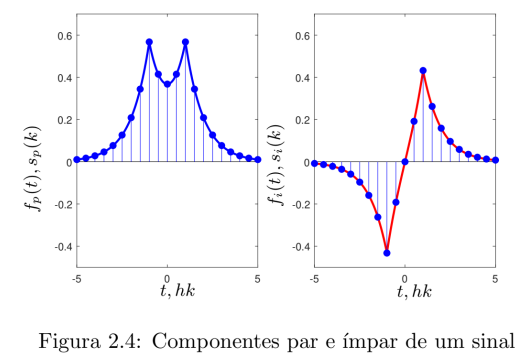

É claro que um sinal qualquer pode não ser par nem ímpar, mas qualquer sinal pode ser decomposto na forma $f(k)=f_p(k)+f_i(k)$, em que $f_p(k)$ é a sua componente par e $f_i(k)$ é a sua componente ímpar, que são dadas por
$$
\begin{aligned}
f_p(k) & =\frac{1}{2}(f(k)+f(-k)) \\
f_i(k) & =\frac{1}{2}(f(k)-f(-k))
\end{aligned}
$$

A partir da simples aplicação da Definição 2.6 conclui-se que, de fato, o sinal $f_p(k)$ é par e que o sinal $f_i(k)$ é ímpar. É também possível verificar que para qualquer sinal as suas componentes par e ímpar são ortogonais. Esta importante propriedade decorre do cálculo do produto escalar $\left\langle f_p, f_i\right\rangle$ exatamente como foi feito no caso a tempo contínuo. Em muitas situações é útil lembrar que, para qualquer sinal $f(k)$, o sinal produto a ele associado $s(k)=f(k) f(-k)$ é sempre um sinal par. Observe que o mesmo não ocorre com o sinal resultante da divisão $f(k) / f(-k)$, ainda que esta operação possa ser realizada para todo $k \in \mathbb{Z}$.

**Exemplo** Seja o sinal a tempo contínuo $f(t)=e^{-|t-1|}$ com domínio $t \in \mathbb{R}$. A partir dele construímos o sinal a tempo discreto $s(k)=f(k h)$ com domínio $k \in \mathbb{Z}$. A Figura 2.4 mostra as componentes par e ímpar de cada sinal no intervalo de tempo $t \in[-5,5]$ e $k \in[-10,10]$. A fim de representar ambos os sinais na mesma abscissa temporal, para o sinal a tempo discreto consideramos $t=h k \operatorname{com} k \in[-10,10]$ e $h=0,5$. Como foi dito, pode-se verificar numericamente que, em ambos os casos, as componentes par e ímpar são ortogonais.

**Exemplo** (Energia e Potência) De maneira similar aos sinais a tempo contínuo, para os sinais a tempo discreto a quantidade $E=\|f\|^2$ quando finita classifica-o como um sinal de energia. Por outro lado, se $P=\|f\|_{e f}^2$ for finita ele é classificado como um sinal de potência. Eventuais interpretações físicas dessas quantidades são feitas de maneira aproximada via amostragem.

No estudo de sinais a tempo discreto também existem algumas funções que são especiais e que, portanto, merecem ser apresentadas de maneira mais detalhada. Todas elas são definidas no domínio $k \in \mathbb{Z}$ e têm imagem em $\mathbb{R}$.

- Degrau unitário: Trata-se de uma das funções mais importantes no estudo de sinais. Ela é definida por
$$
v(k)=\left\{\begin{array}{lll}
1 & , & k \geq 0 \\
0 & , & k<0
\end{array}\right.
$$
e observe que $v(0)=1$.

- Retângulo unitário: Trata-se de uma função usada para selecionar partes simétricas (em relação à origem) de sinais. Ela é definida na forma
$$
\vartheta(k)=\left\{\begin{array}{lll}
1 & , & |k| \leq n \\
0 & , & |k|>n
\end{array}\right.
$$
sendo $1 \leq n \in \mathbb{N}$. Ela pode ser escrita como uma composição de dois degraus unitários deslocados, ou seja, $\vartheta(k)=v(k+n)-v(k-n-1)$. É claro que a sua largura pode ser alterada segundo o valor de $n \in \mathbb{N}$ escolhido.

Por fim, desejamos introduzir o chamado impulso unitário, que tem importância singular no estudo de sinais (e de sistemas) a tempo discreto. Como é usual, adotamos a mesma notação $\delta(k)$, mas se trata de um ente matemático muito diferente do impulso unitário a tempo contínuo e é definido por
$$
\delta(k)=\left\{\begin{array}{lll}
1 & , & k=0 \\
0 & , & k \neq 0
\end{array}\right.
$$

Em algumas situações é conveniente identificar $\delta(k)=0^k$, lembrando que $0^0=1$, por definição. A seguinte igualdade se estabelece
$$
\sum_{k=-\infty}^{\infty} f(k) \delta(k-n)=f(n)
$$

a qual seleciona, para cada $n \in \mathbb{Z}$ dado, o valor da função $f(k)$ no instante $k=n \in \mathbb{Z}$. Como $\delta(k-n)=0$ para todo $k \neq n$ e $\delta(k-n)=1$ para $k=n$, verifica-se a validade da relação acima de maneira trivial. Funções elementares podem ser escritas com o impulso unitário. O degrau unitário é uma delas
$$
v(k)=\sum_{n=-\infty}^k \delta(n)
$$
como pode ser verificado sem dificuldades. O impulso unitário em tempo discreto não tem as singularidades do seu homônimo $\delta(t)$ em tempo contínuo. São entidades matemáticas diversas. Como já foi dito, ambos têm grande utilidade não só no estudo de sinais, mas também no estudo de sistemas dinâmicos, como ficará claro no decorrer dos próximos capítulos deste livro.

Vale ressaltar que tudo foi feito para sinais com imagem em $\mathbb{C}$. Os mesmos resultados para o caso específico de sinais com imagem em $\mathbb{R}$ decorrem de forma imediata. Trabalhar diretamente com o conjunto $\mathbb{C}$ facilita os cálculos, mas requer uma certa destreza com números complexos e funções de variável complexa.

### Lista de exercícios 1a

**Exercício 1** Considere o sinal $f(t)$ a tempo contínuo mostrado na Figura 2.6. Apresente um esboço de cada um dos seguintes sinais:

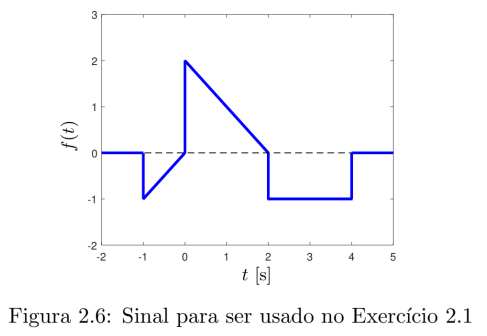

a) $f(t-2)$.

b) $f(3-t)$.

c) $f(3-2 t)$.

**Exercício 2** Considere o sinal $f(t)=e^{j \omega_1 t}+e^{j \omega_2 t}$ com domínio $\mathbb{R}$. Mostre que para este sinal ser periódico é necessário que a relação $\omega_1 / \omega_2$ seja um número racional. Se isto ocorrer, qual é o seu período? Aplique o resultado nos seguintes casos:

a) $\omega_1=2$ e $\omega_2=3$.

b) $\omega_1=2 \pi$ e $\omega_2=3 \pi$.

c) $\omega_1=2 / \pi$ e $\omega_2=3 / \pi$.

**Exercício 3** Verifique se os seguintes sinais com domínio $\mathbb{R}$ são periódicos. Em caso afirmativo, determine o respectivo período.

a) $f(t)=\cos (\sqrt{2} t)$

e) $f(t)=e^{(-1+j 2 \pi / 3) t}$

b) $f(t)=2 \cos (3 t+2)-3 \operatorname{sen}(4 t-1)$

f) $f(t)=e^{j t}+2 e^{j t / 3}$

c) $f(t)=\cos (t)+\cos (\sqrt{2} t)$

g) $f(t)=\sum_{k=0}^{10} e^{j(\pi / 2) k t}$

d) $f(t)=e^{j(2 \pi / 3) t}$

h) $f(t)=\operatorname{sen}(2 \pi t)+\cos (5 \pi t)+\operatorname{sen}(3 \pi t)$